In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df=pd.read_csv('Algerian_forest_fires_new.csv')
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
## Division of features into dependent and independent features 
x=df.drop('FWI',axis=1)
y=df['FWI']

In [10]:
x

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [11]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

# Train test split 

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((162, 12), (81, 12), (162,), (81,))

In [14]:
x_train.corr()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Unnamed: 0,1.000000,0.215508,-0.422239,-0.191672,-0.004914,0.228679,0.281651,0.063534,0.296308,0.204658,0.167675,0.865687
Temperature,0.215508,1.000000,-0.645265,-0.277672,-0.296203,0.675610,0.491425,0.388655,0.619326,0.466639,0.524026,0.262263
RH,-0.422239,-0.645265,1.000000,0.323053,0.243998,-0.662835,-0.378570,-0.208048,-0.698165,-0.325142,-0.454272,-0.424598
Ws,-0.191672,-0.277672,0.323053,1.000000,0.157871,-0.221529,-0.004990,0.058616,-0.003502,0.020347,-0.112564,-0.183342
Rain,-0.004914,-0.296203,0.243998,0.157871,1.000000,-0.540088,-0.249265,-0.269304,-0.332190,-0.260814,-0.378767,-0.053389
FFMC,0.228679,0.675610,-0.662835,-0.221529,-0.540088,1.000000,0.572258,0.478692,0.735824,0.556612,0.771676,0.220606
DMC,0.281651,0.491425,-0.378570,-0.004990,-0.249265,0.572258,1.000000,0.880355,0.659206,0.984071,0.563658,0.207554
DC,0.063534,0.388655,-0.208048,0.058616,-0.269304,0.478692,0.880355,1.000000,0.488644,0.948635,0.474731,-0.081293
ISI,0.296308,0.619326,-0.698165,-0.003502,-0.332190,0.735824,0.659206,0.488644,1.000000,0.614931,0.723071,0.281300
BUI,0.204658,0.466639,-0.325142,0.020347,-0.260814,0.556612,0.984071,0.948635,0.614931,1.000000,0.550432,0.103609


# Multicollinearity 

<Axes: >

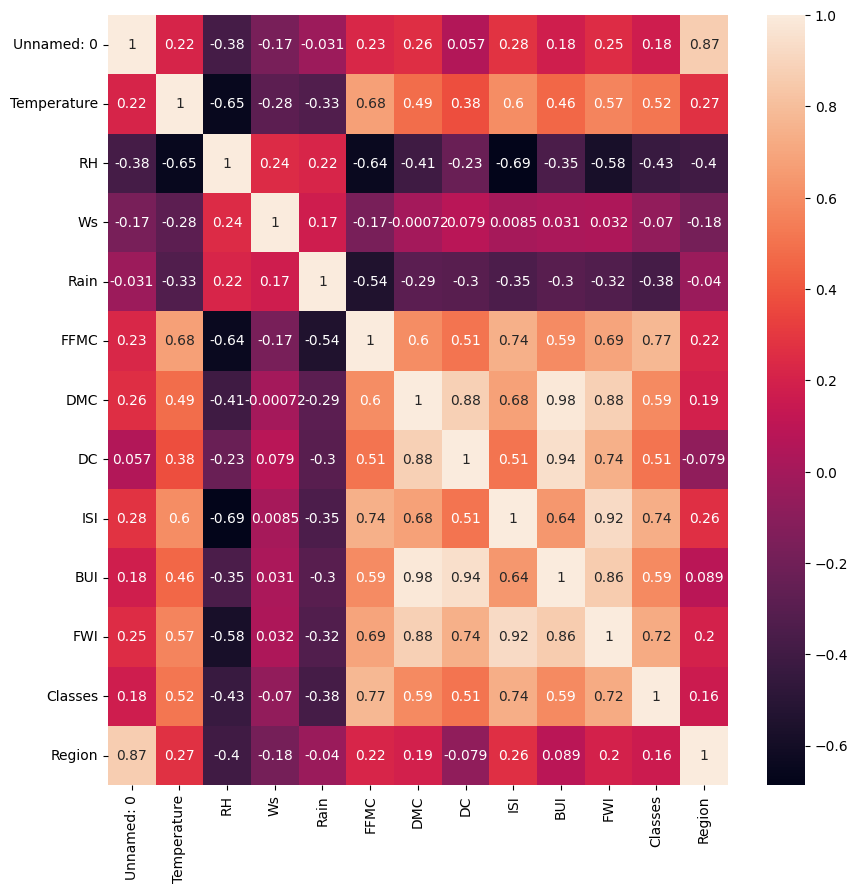

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Multicollinearity-- independent feature will be highly correlated. 

In [16]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                
        
    

In [17]:
corr_features=correlation(x_train,threshold=0.85)


In [18]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [19]:
x_train.shape,x_test.shape

((162, 9), (81, 9))

# Standardisation 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [21]:
x_test_scaled,x_train_scaled

(array([[-9.01201821e-01, -3.49661769e-01,  1.23749457e+00,
         -1.53544113e-01, -3.43054338e-01,  4.66215621e-01,
          1.01597844e+00, -8.07267769e-02,  8.18598249e-01],
        [ 1.50358409e+00,  2.05683394e-01, -2.41375230e+00,
         -8.54224292e-01, -3.43054338e-01,  1.08949612e+00,
          4.40439017e-01,  2.19054397e+00,  8.18598249e-01],
        [-6.30841275e-01,  1.03870114e+00, -4.84791689e-01,
          8.97476155e-01, -3.43054338e-01,  7.59524090e-01,
          3.45829796e-01,  1.11467888e+00,  8.18598249e-01],
        [ 1.41820708e+00, -9.05006932e-01,  8.93037321e-01,
         -1.53544113e-01,  2.97074280e-01, -1.43295671e+00,
         -8.60437769e-01, -1.01314319e+00, -1.22160046e+00],
        [-6.59300280e-01,  1.03870114e+00, -2.55153520e-03,
          8.97476155e-01, -1.68473806e-01,  8.49146122e-02,
         -3.08550648e-01, -5.34980926e-01,  8.18598249e-01],
        [ 3.65223896e-01,  1.03870114e+00, -4.15900238e-01,
         -1.53544113e-01, -3.430543

<Axes: title={'center': 'Boxplot after scaling'}>

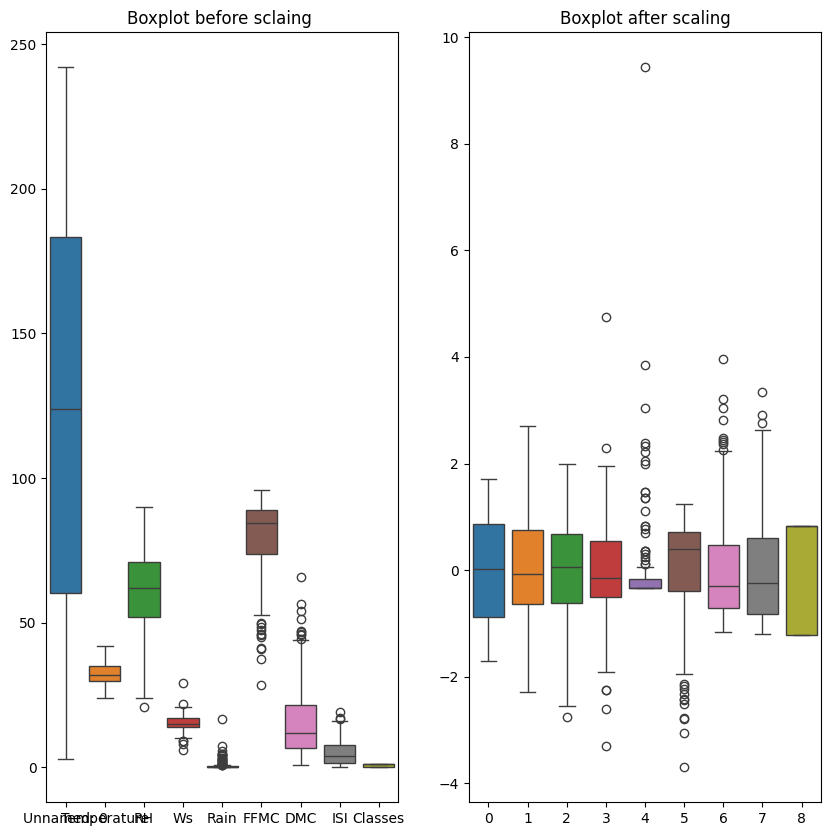

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title("Boxplot before sclaing ")

plt.subplot(1,2,2)
plt.title("Boxplot after scaling")
sns.boxplot(x_train_scaled)

# Linear Regression

MSE 0.9944045405557135
MAE 0.7044238159306822
RMSE 0.9971983456442923


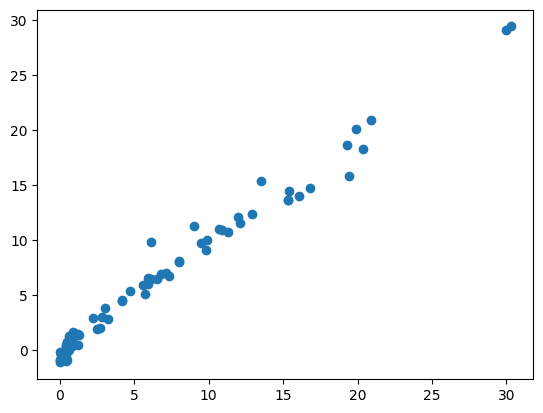

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
regression=LinearRegression(n_jobs=5)
regression.fit(x_train_scaled,y_train)
y_pred=regression.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
plt.scatter(y_test,y_pred)

MSE 2.4432872611532064
MAE 1.131457914512571
RMSE 1.5631018076738337


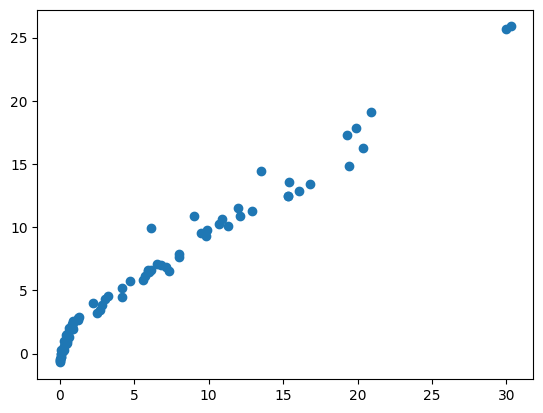

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
plt.scatter(y_test,y_pred)


# Ridge Regression

MSE 1.033665995340464
MAE 0.7275447023423506
RMSE 1.0166936585523016


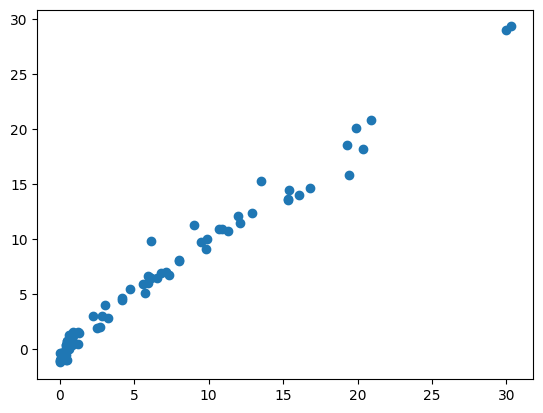

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
plt.scatter(y_test,y_pred)



# Elastic Net Regression

MSE 5.564760345471063
MAE 1.7318251153206248
RMSE 2.3589744266250667


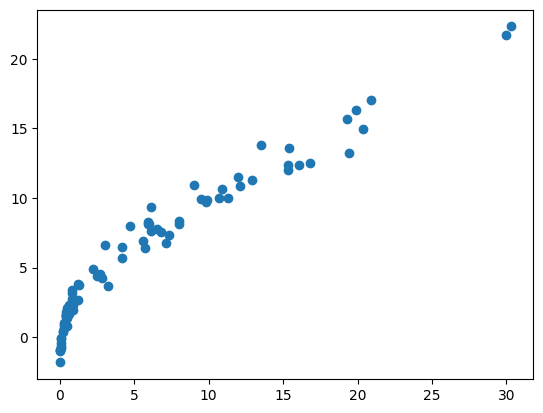

In [26]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
plt.scatter(y_test,y_pred)

# Hyperparameter Tuning 

Cross Validation Lasso 

In [27]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [28]:
lassocv.alpha_

np.float64(0.20938674111136785)

In [29]:
lassocv.alphas_

array([6.85647178, 6.39436853, 5.96340949, 5.56149565, 5.18666946,
       4.83710529, 4.51110059, 4.20706751, 3.92352524, 3.65909277,
       3.41248216, 3.18249228, 2.96800296, 2.76796949, 2.58141761,
       2.4074387 , 2.24518539, 2.09386741, 1.95274776, 1.82113909,
       1.69840041, 1.58393391, 1.47718207, 1.37762494, 1.28477763,
       1.19818792, 1.11743406, 1.04212274, 0.97188716, 0.90638522,
       0.84529789, 0.78832764, 0.73519699, 0.68564718, 0.63943685,
       0.59634095, 0.55614956, 0.51866695, 0.48371053, 0.45111006,
       0.42070675, 0.39235252, 0.36590928, 0.34124822, 0.31824923,
       0.2968003 , 0.27679695, 0.25814176, 0.24074387, 0.22451854,
       0.20938674, 0.19527478, 0.18211391, 0.16984004, 0.15839339,
       0.14771821, 0.13776249, 0.12847776, 0.11981879, 0.11174341,
       0.10421227, 0.09718872, 0.09063852, 0.08452979, 0.07883276,
       0.0735197 , 0.06856472, 0.06394369, 0.05963409, 0.05561496,
       0.05186669, 0.04837105, 0.04511101, 0.04207068, 0.03923

In [30]:
lassocv.predict(x_test_scaled)

array([10.73235142, 18.55298775, 13.55926553,  0.10495499,  4.11422854,
       12.04732332, -0.06191892, 19.43183007, -1.67194322,  7.06542471,
       15.82173728, -0.77361872, 11.77215601, 15.26011659,  5.57874201,
        2.18550462,  1.24606626,  3.57571753, 11.03828698,  6.9602216 ,
       10.39161687, -1.55411035,  7.65055832,  1.94983888, -1.02191422,
        2.6116915 ,  0.26309558, 11.43303376,  1.2650109 ,  4.88289656,
       -0.35925546,  5.91719242,  3.89911974,  1.3417299 ,  1.14717803,
        6.76728202,  6.43434035,  4.1419065 ,  3.39540772, -0.7182628 ,
       13.06737712, -1.29157279,  1.66042952,  6.40746854,  0.10414885,
        2.26141748, -0.07535482,  0.22910274,  0.77554093,  7.96294306,
       28.51235099, -0.69058484,  2.90983418, 20.60505327, -0.6549797 ,
        6.50165418, 10.52987237, 28.10013756, -1.83088995,  9.55160428,
       14.25994787, 17.50297185, -1.1049481 , 10.02683219,  6.30938645,
       -0.15126768,  0.18086785, 14.43945154,  1.71578544,  6.46

In [31]:
lassocv.mse_path_

array([[56.45633283, 62.20325237, 47.6418151 , 58.5218543 , 52.64553484],
       [50.89987439, 59.65630551, 43.94660981, 53.47326233, 47.42722832],
       [46.00697408, 52.36073818, 38.88255441, 48.9972654 , 42.86946698],
       [41.54122079, 45.82201448, 33.62218724, 45.0250104 , 38.3742206 ],
       [36.39416577, 40.13210319, 29.12700332, 41.49622638, 33.79178386],
       [31.91079379, 35.18060454, 25.29199375, 37.66726529, 29.78955259],
       [28.00590451, 30.87148689, 22.02619686, 33.18051331, 26.29290573],
       [24.60421924, 27.12132341, 19.25064893, 29.25950095, 23.23704916],
       [21.64055977, 23.85742891, 16.89718853, 25.83314064, 20.56555696],
       [19.05821297, 21.0166142 , 14.90675614, 22.83754208, 18.22896332],
       [16.80782971, 18.54389296, 13.22826301, 20.21764416, 16.1851514 ],
       [14.84615864, 16.39149173, 11.81750497, 17.92548736, 14.39646501],
       [13.13649194, 14.51778307, 10.63631945, 15.91929314, 12.83042052],
       [11.64595037, 12.88657886,  9.6

In [32]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

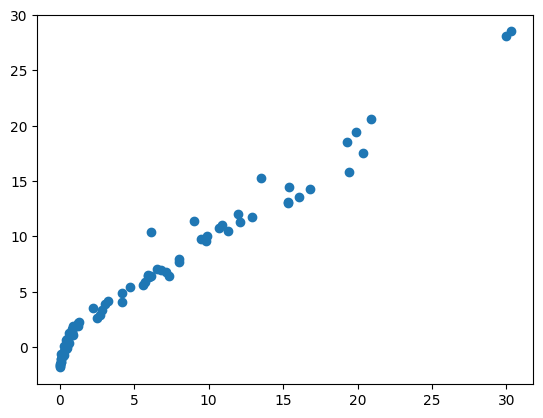

In [33]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)

In [34]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MAE",mae)
print("MSE",mse)
print("RMSE",rmse)
print("R2_score",score)

MAE 0.8850455319479558
MSE 1.4663438589946869
RMSE 1.2109268594736375
R2_score 0.9711560672363045


RidgeCV

r2_score 0.9796671208551146
MSE 1.03366599534272
MAE 0.7275447023445466
RMSE 1.0166936585534112


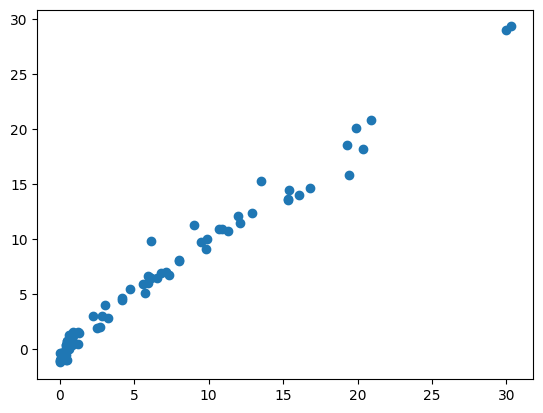

In [35]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("r2_score",score)
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
plt.scatter(y_test,y_pred)

In [36]:
ridgecv.alpha_

np.float64(1.0)

In [37]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [38]:
ridgecv.get_metadata_routing()
ridgecv.best_score_
ridgecv.coef_

array([-0.28488595,  0.04709276, -0.22369345,  0.09376982, -0.07058842,
       -0.71892512,  3.73577234,  4.44934602,  0.44528357])

# Elastic Net CV

MSE 1.1753063611873433
MAE 0.788071059290609
RMSE 1.0841154741019718
R2_score 0.9768809631854883


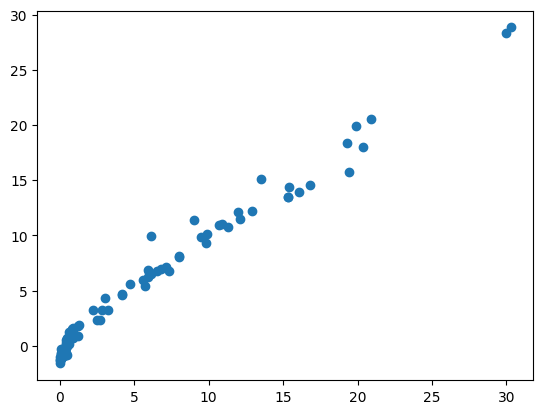

In [39]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV()
elasticcv.fit(x_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
print("R2_score",score)
plt.scatter(y_test,y_pred)
#plt.plot(y_test,y_pred)

In [40]:
elasticcv.alpha_
elasticcv.n_jobs
elasticcv.fit_intercept
elasticcv.alphas_

array([13.71294356, 12.78873706, 11.92681898, 11.1229913 , 10.37333891,
        9.67421059,  9.02220117,  8.41413501,  7.84705047,  7.31818553,
        6.82496432,  6.36498457,  5.93600591,  5.53593898,  5.16283522,
        4.81487741,  4.49037078,  4.18773482,  3.90549551,  3.64227818,
        3.39680083,  3.16786782,  2.95436413,  2.75524988,  2.56955526,
        2.39637583,  2.23486812,  2.08424549,  1.94377432,  1.81277044,
        1.69059578,  1.57665528,  1.47039399,  1.37129436,  1.27887371,
        1.1926819 ,  1.11229913,  1.03733389,  0.96742106,  0.90222012,
        0.8414135 ,  0.78470505,  0.73181855,  0.68249643,  0.63649846,
        0.59360059,  0.5535939 ,  0.51628352,  0.48148774,  0.44903708,
        0.41877348,  0.39054955,  0.36422782,  0.33968008,  0.31678678,
        0.29543641,  0.27552499,  0.25695553,  0.23963758,  0.22348681,
        0.20842455,  0.19437743,  0.18127704,  0.16905958,  0.15766553,
        0.1470394 ,  0.13712944,  0.12788737,  0.11926819,  0.11

In [41]:
elasticcv.score
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': None,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

### Pickle the machine learning model and preprocessing model 

In [42]:
scaler

StandardScaler()

In [43]:
ridge # Becoz it has better accuracy 

Ridge()

In [44]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))